<a href="https://colab.research.google.com/github/saran2811/Nltk-and-web-scrapping/blob/main/Nltk_and_Web_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary library

In [1]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
from bs4 import BeautifulSoup
import requests
import warnings
from nltk import word_tokenize
import nltk
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [22]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
pip install html5lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Extracting Data from a URL using BeautifulSoup

In [6]:
def Extraction(url):
    page=requests.get(url,headers={'User-Agent' : 'My User Agent 1.0'})
    soup=BeautifulSoup(page.content,"html.parser")
    title=soup.title.string
    content=soup.find_all('p')
    content_full=str(title)
    print(content_full)
    for text in content: 
        content_full+=' '+text.get_text()
    return content_full
    

In [7]:
Data=Extraction('https://insights.blackcoffer.com/deep-learning-impact-on-areas-of-e-learning/')

Deep learning impact on areas of e-learning? - Blackcoffer Insights


In [8]:
Data

'Deep learning impact on areas of e-learning? - Blackcoffer Insights eLearning as technology becomes more affordable in higher education but having a big barrier in the cost of developing its resources. Deep learning using artificial intelligence continues to become more and more popular and having impacts on many areas of eLearning. It offers online learners of the future intuitive algorithms and automated delivery of eLearning content through modern LMS platforms. This paper aims to survey various applications of deep learning approaches for developing the resources of the eLearning platform, in which predictions, algorithms, and analytics come together to create more personalized future eLearning experiences. In addition, deep learning models for developing the contents of the eLearning platform, deep learning framework that enable deep learning systems into eLearning and its development, benefits & future trends of deep learning in eLearning, the relevant deep learning-based artifi

In [38]:
f

['Deep learning impact on areas of e-learning? - Blackcoffer Insights eLearning as technology becomes more affordable in higher education but having a big barrier in the cost of developing its resources',
 ' Deep learning using artificial intelligence continues to become more and more popular and having impacts on many areas of eLearning',
 ' It offers online learners of the future intuitive algorithms and automated delivery of eLearning content through modern LMS platforms',
 ' This paper aims to survey various applications of deep learning approaches for developing the resources of the eLearning platform, in which predictions, algorithms, and analytics come together to create more personalized future eLearning experiences',
 ' In addition, deep learning models for developing the contents of the eLearning platform, deep learning framework that enable deep learning systems into eLearning and its development, benefits & future trends of deep learning in eLearning, the relevant deep lear

# Tokenizing important words

In [9]:
def clean(Data):
  tok_word=word_tokenize(Data)
  stop_word=set(stopwords.words('english'))
  Sklearn_stopwords=set(ENGLISH_STOP_WORDS)
  stop_word=Sklearn_stopwords.union(stop_word)
  Word_after_stop=[x for x in tok_word if x not in stop_word]
  word_list=[re.sub(r'\W','',x) for x in Word_after_stop]
  [word_list.remove("") for i in range(word_list.count(""))]
  word_list=[x.lower() for x in word_list]
  word_list=[x for x in word_list if len(x)>2]
  return word_list

In [10]:
final_list=clean(Data)

In [16]:
len(final_list)

1059

In [30]:
final_list

['deep',
 'learning',
 'impact',
 'areas',
 'elearning',
 'blackcoffer',
 'insights',
 'elearning',
 'technology',
 'affordable',
 'higher',
 'education',
 'big',
 'barrier',
 'cost',
 'developing',
 'resources',
 'deep',
 'learning',
 'using',
 'artificial',
 'intelligence',
 'continues',
 'popular',
 'impacts',
 'areas',
 'elearning',
 'offers',
 'online',
 'learners',
 'future',
 'intuitive',
 'algorithms',
 'automated',
 'delivery',
 'elearning',
 'content',
 'modern',
 'lms',
 'platforms',
 'this',
 'paper',
 'aims',
 'survey',
 'various',
 'applications',
 'deep',
 'learning',
 'approaches',
 'developing',
 'resources',
 'elearning',
 'platform',
 'predictions',
 'algorithms',
 'analytics',
 'come',
 'create',
 'personalized',
 'future',
 'elearning',
 'experiences',
 'addition',
 'deep',
 'learning',
 'models',
 'developing',
 'contents',
 'elearning',
 'platform',
 'deep',
 'learning',
 'framework',
 'enable',
 'deep',
 'learning',
 'systems',
 'elearning',
 'development',
 'be

# **Finding Postive,Negative and Neutral words.**

In [79]:
pos_list=[]
neu_list=[]
neg_list=[]
x=['pos_words','neg_words','neutral_words']
y=[]
sen_pol=SentimentIntensityAnalyzer()

In [80]:
for i in final_list:
  score=sen_pol.polarity_scores(i)['compound']
  if score>0:
    pos_list.append(i)
  if score==0:
    neu_list.append(i)
  if score<0:
    neg_list.append(i)

In [81]:
print("Total postive words in list are:",len(pos_list))
y.append(len(pos_list))
print('\n\n')
print("Total negative words in list are:",len(neg_list))
print('\n\n')
y.append(len(neg_list))
print("Total neutral words in list are:",len(neu_list))
y.append(len(neu_list))

Total postive words in list are: 108



Total negative words in list are: 34



Total neutral words in list are: 917


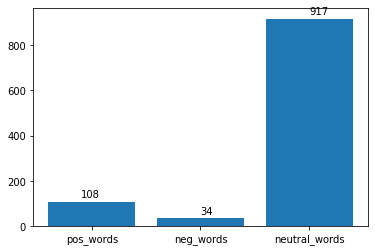

In [83]:
plt.bar(x,y)
plt.text(x=-.1,y=y[0]+ 20, s=str(y[0]))
plt.text(x=1,y=y[1]+ 20, s=str(y[1]))
plt.text(x=2,y=y[2]+ 20, s=str(y[2]))
plt.show()

# **Analyzing overall sentiment of the article**

Getting setentences form the article

In [84]:
sent=list(Data.split('.'))

In [85]:
len(sent)

86

In [86]:

sen_pol=SentimentIntensityAnalyzer()

In [87]:
total_score=0
for i in sent:
  score=sen_pol.polarity_scores(i)['compound']
  total_score+=score
if total_score>0:
  print('Article is positive')
  print('Total article score: ',total_score)
if total_score<0:
  print('Article is Negative')
  print('Total article score: ',total_score)
if total_score==0:
  print('Article is neutral')
  print('Total article score: ',total_score)

Article is positive
Total article score:  21.043400000000005
